name-kaustubh jagtap

roll no=09

prn-22SC114501064

TITLE-Detecting Algorithmic Bias in a Hiring Dataset

In [20]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from fairlearn.metrics import MetricFrame, selection_rate
from fairlearn.reductions import ExponentiatedGradient, DemographicParity

In [5]:
!pip install fairlearn

In [6]:
data= pd.read_csv("/content/test_Y3wMUE5_7gLdaTN.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [32]:
# Drop non-numeric and irrelevant columns for logistic regression
data_numeric = data.drop(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'], axis=1)

# Handle missing values (using mean imputation for simplicity)
data_numeric.fillna(data_numeric.mean(), inplace=True)


X = data_numeric.drop('Credit_History', axis=1)
y = data_numeric['Credit_History'].astype(int)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression model: {accuracy}")
# Display the Logistic Regression model object
print(model)

# Display the first few predictions and actual values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
display(results.head())

Accuracy of Logistic Regression model: 0.6756756756756757
LogisticRegression()


,Actual,Predicted
193,0,1
33,1,1
15,1,1
311,0,1
57,1,1


In [31]:
# Display the Logistic Regression model object
print(model)

LogisticRegression()


In [12]:
# Fairness evaluation
sex = X_test_encoded['Gender_Male']
metric_frame = MetricFrame(metrics=selection_rate,
                           y_true=y_test_encoded,
                           y_pred=y_pred_encoded,
                           sensitive_features=sex)
print("Selection Rates by Gender:\n", metric_frame.by_group)

Selection Rates by Gender:
 Gender_Male
False    1.0
True     1.0
Name: selection_rate, dtype: float64


<Axes: xlabel='Gender', ylabel='Selection Rate'>

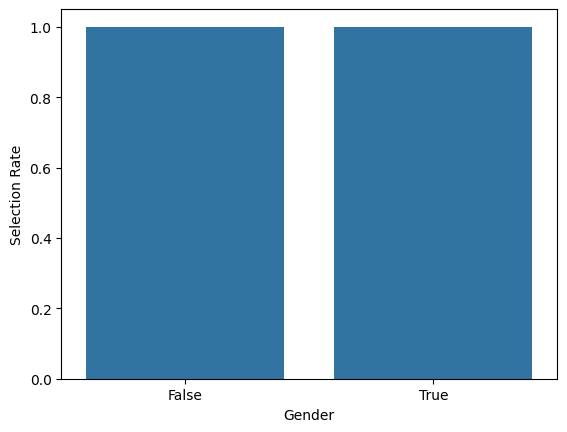

In [14]:
# Create a DataFrame for plotting
selection_rates = metric_frame.by_group
df = pd.DataFrame({'Gender': selection_rates.index, 'Selection Rate': selection_rates.values})

# Plot the selection rates
sns.barplot(x='Gender', y='Selection Rate', data=df)

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the metrics you want to evaluate
metrics = {
    'accuracy': accuracy_score,
    'precision': precision_score,
    'recall': recall_score,
    'f1_score': f1_score,
    'selection_rate': selection_rate,
}

# Create a MetricFrame with multiple metrics
metric_frame_all = MetricFrame(metrics=metrics,
                               y_true=y_test_encoded,
                               y_pred=y_pred_encoded,
                               sensitive_features=X_test_encoded['Gender_Male'])

# Display the metrics by group
print("Performance Metrics by Gender:\n", metric_frame_all.by_group)

Performance Metrics by Gender:
              accuracy  precision  recall  f1_score  selection_rate
Gender_Male                                                       
False        0.631579   0.631579     1.0  0.774194             1.0
True         0.690909   0.690909     1.0  0.817204             1.0


Distribution of Credit_History (proportion):
 Credit_History
1.0    0.825444
0.0    0.174556
Name: proportion, dtype: float64


<Axes: xlabel='Credit_History', ylabel='count'>

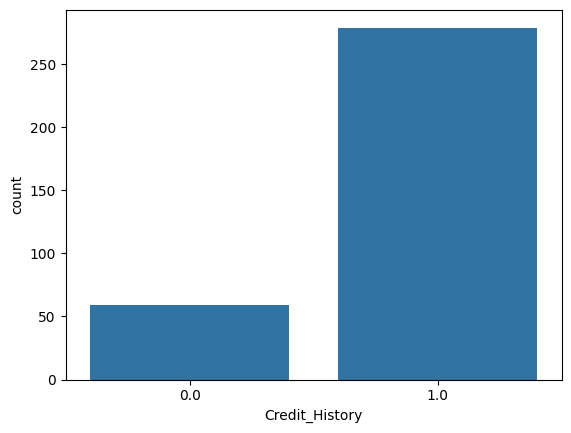

In [26]:
# Check the distribution of the target variable 'Credit_History'
credit_history_distribution = data['Credit_History'].value_counts(normalize=True)
print("Distribution of Credit_History (proportion):\n", credit_history_distribution)

# You can also visualize this distribution
sns.countplot(x='Credit_History', data=data)

Our aim in this experiment, "Detecting Algorithmic Bias in a Hiring Dataset," is to determine if the model we build to make predictions (in this case, predicting `Credit_History`) is making decisions that are **unfairly disadvantaging or favoring certain groups of people**, specifically focusing on **gender** as a sensitive attribute.
